In [2]:
from locale import atoi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)


def input_data(path):
    data = pd.read_csv(path)
    return data


def read_info(data):
    print(data.info())  # show features
    print(data.head())  # show data structure
    print(data.corr())  # show Line Correlation


def clean_data(data):
    # we need to drop some columns not related to our study
    data = data.drop("team_abbreviation", axis=1)
    data = data.drop("college", axis=1)
    data = data.drop("country", axis=1)
    data = data.drop("draft_year", axis=1)
    data = data.drop("draft_round", axis=1)
    data = data.drop("draft_number", axis=1)
    # drop who don't play more than 15 games in per season
    sum_gp = 0.0
    for index, row in data.iterrows():
        if row['gp'] < 15:
            data.drop(index, inplace=True)
        else:
            sum_gp += row['gp']
    avg_gp = sum_gp * 1.0 / data.shape[0]
    return data, avg_gp


def get_class(x, data_gp):
    if x["gp"] >= data_gp + 20:
        return 'A'
    elif x["gp"] >= data_gp + 10:
        return 'B'
    elif x["gp"] >= data_gp:
        return 'C'
    elif x["gp"] >= data_gp - 10:
        return 'D'
    else:
        return 'E'


def visualization(data):
    sns.set(style="ticks")
    sns.pairplot(data, hue="level")
    plt.savefig("./pairplot001.png")


def cut_data(data, year):
    new_data = data
    for index, row in data.iterrows():
        start_year = row["season"].split("-")[0]
        if atoi(start_year) >= year:
            # print(start_year)
            # print(row)
            new_data.drop(index, inplace=True)
    return new_data

/Users/louwen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 18 columns):
Unnamed: 0       1521 non-null int64
Unnamed: 0.1     1521 non-null int64
player_name      1521 non-null object
age              1521 non-null float64
player_height    1521 non-null float64
player_weight    1521 non-null float64
gp               1521 non-null int64
pts              1521 non-null float64
reb              1521 non-null float64
ast              1521 non-null float64
net_rating       1521 non-null float64
oreb_pct         1521 non-null float64
dreb_pct         1521 non-null float64
usg_pct          1521 non-null float64
ts_pct           1521 non-null float64
ast_pct          1521 non-null float64
season           1521 non-null object
level            1521 non-null object
dtypes: float64(12), int64(3), object(3)
memory usage: 214.0+ KB
None
   Unnamed: 0  Unnamed: 0.1      player_name   age  player_height  player_weight  gp  pts   reb  ast  net_rating  oreb_pct  dreb_p

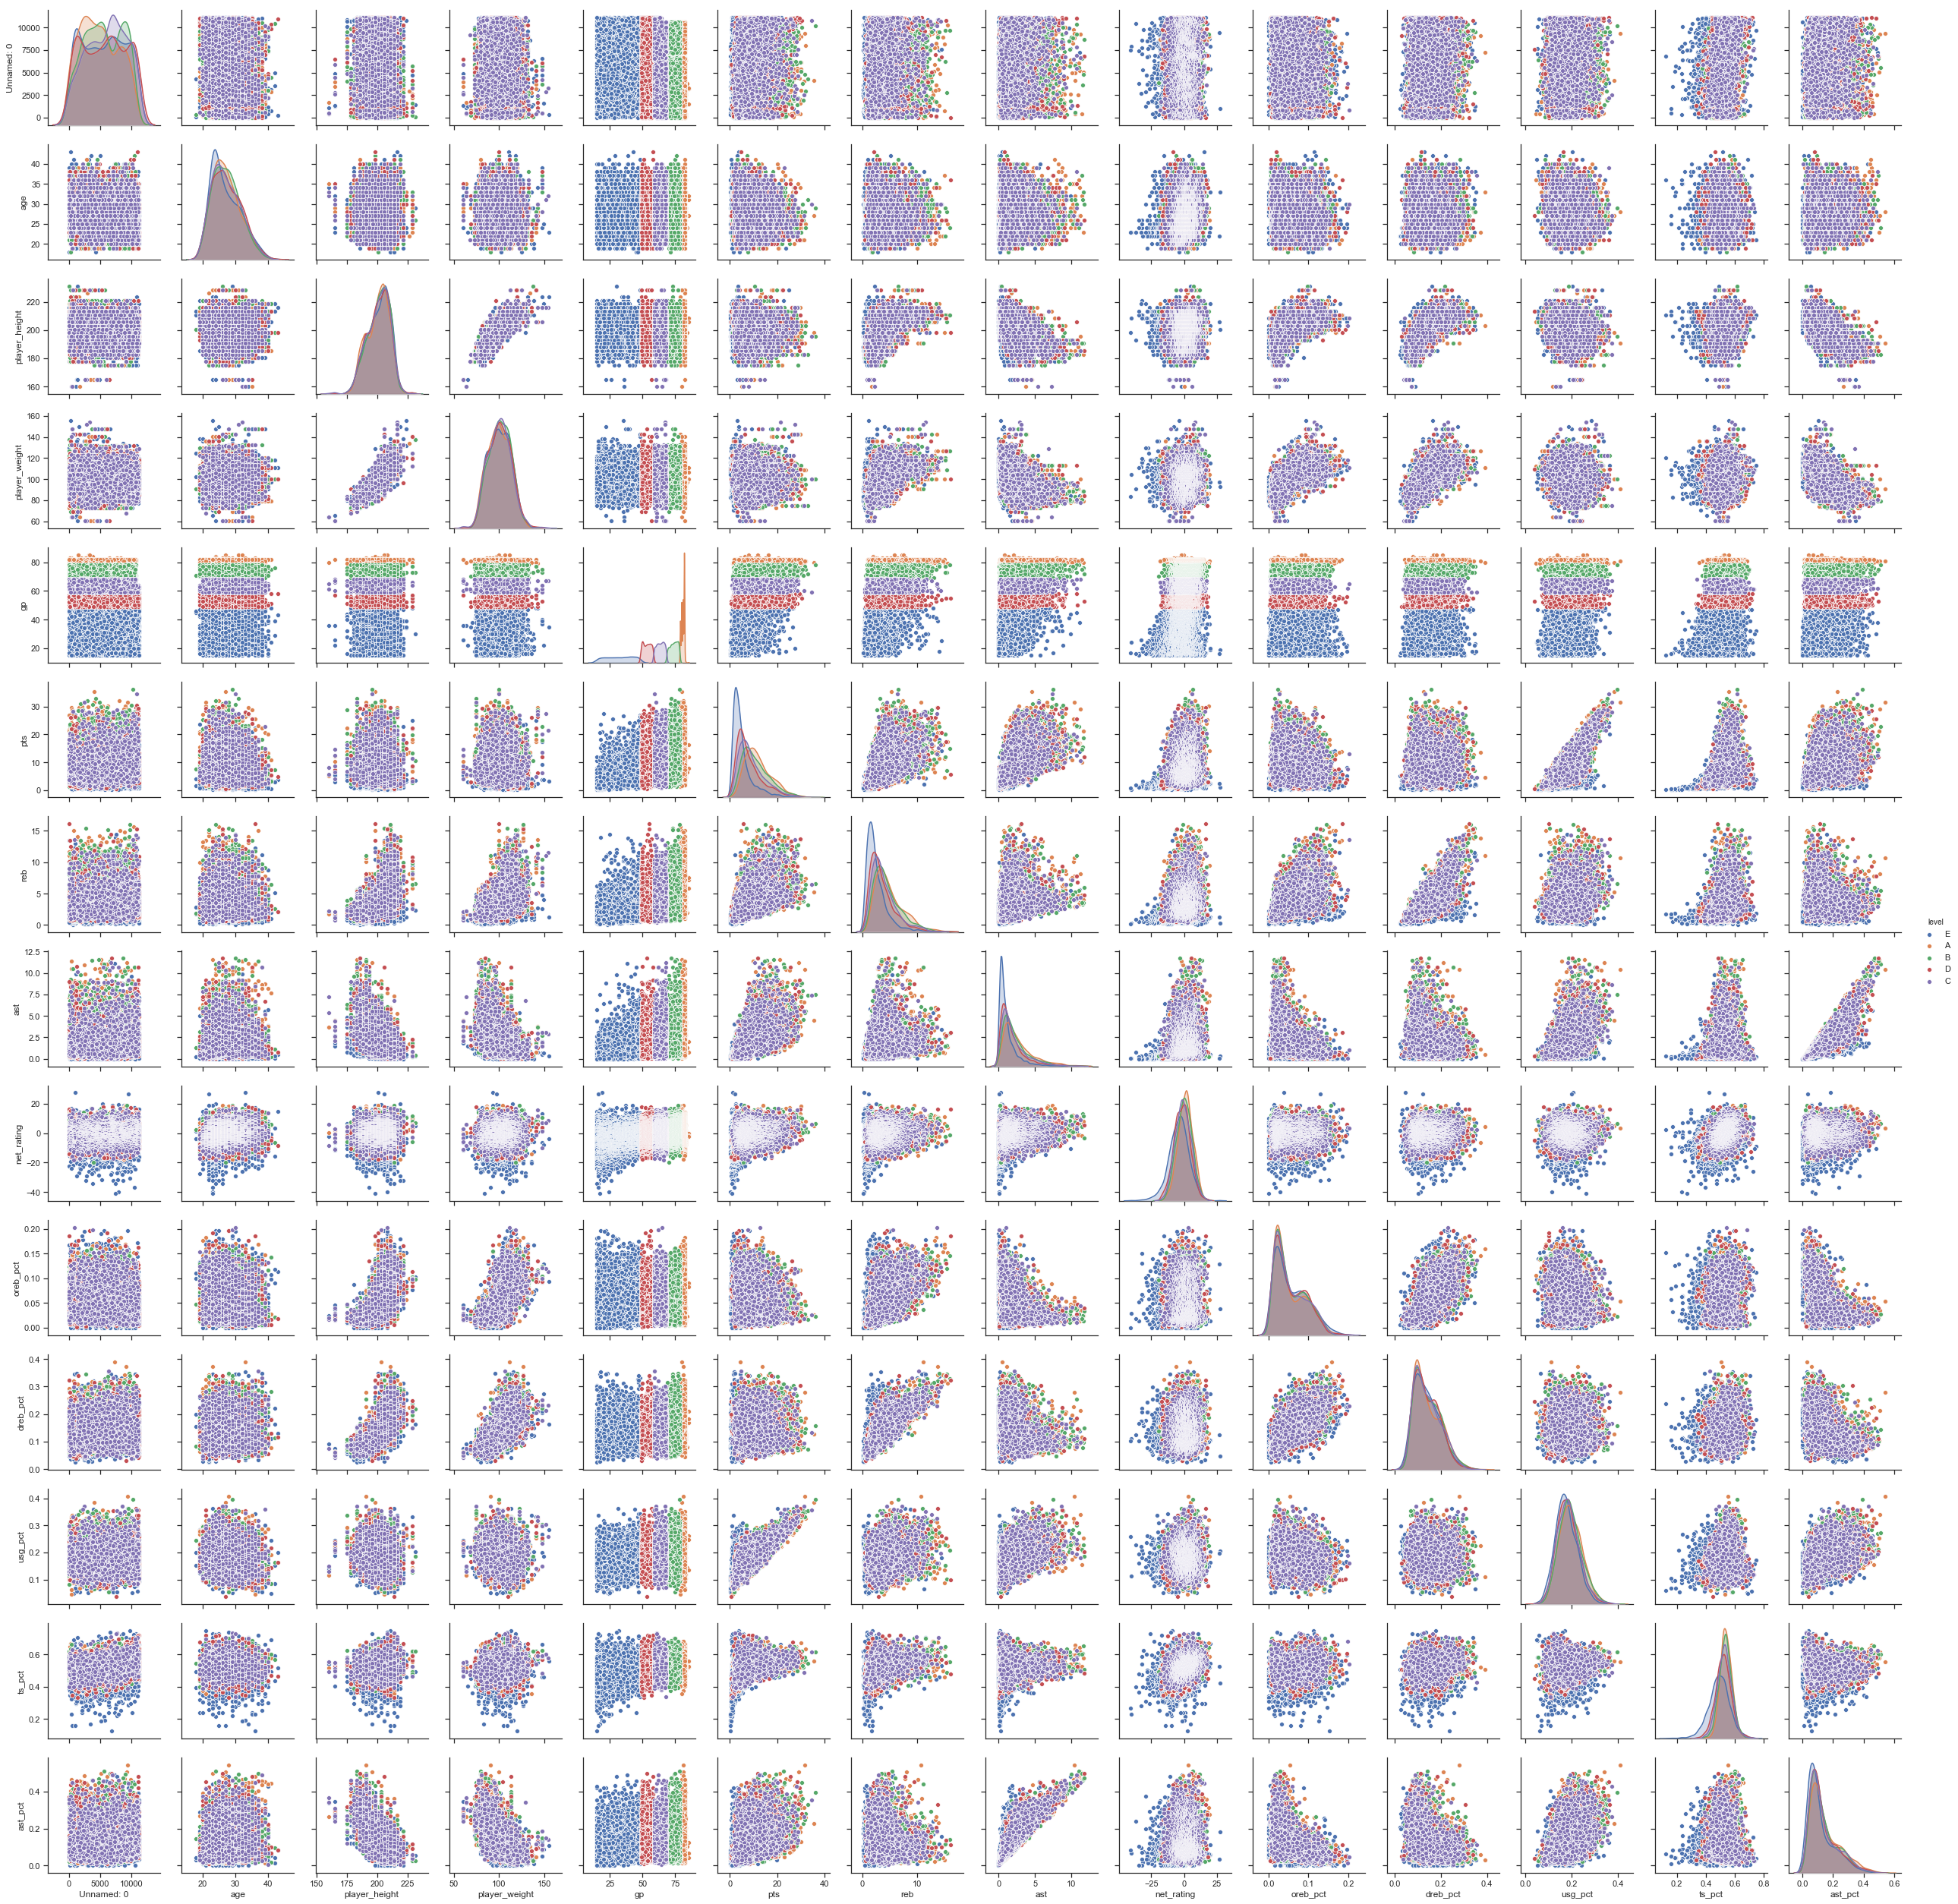

In [4]:
ori_data = input_data("all_seasons.csv")
# read_info(ori_data)
cleaned_data, average_gp = clean_data(ori_data)
cleaned_data.loc[:, "level"] = cleaned_data.apply(get_class, axis=1, args=(average_gp,))
# read_info(cleaned_data)
# print(average_gp)
visualization(cleaned_data)
temp_data = cut_data(cleaned_data, 2000)
# temp_data.drop("player_height", axis=1)
# temp_data.drop("player_weight", axis=1)
# read_info(temp_data)
temp_data.to_csv("test.csv")

# test
ori_data = input_data("test.csv")
read_info(ori_data)
# visualization(ori_data)